## UFO Sightings: Exploratory Analysis
#### Kelsey Herbst
#### BIOS 512 Final Project

In [1]:
library(tidyverse)
library(forcats)
library(dplyr)
library(lubridate)

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Reading in UFO Sightings.csv data

In [22]:
ufo_sightings = readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-06-20/ufo_sightings.csv')

ufo_sightings |> head()

Rows: 96429 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): city, state, country_code, shape, reported_duration, summary, day_...
dbl  (1): duration_seconds
lgl  (1): has_images
dttm (2): reported_date_time, reported_date_time_utc
date (1): posted_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


reported_date_time,reported_date_time_utc,posted_date,city,state,country_code,shape,reported_duration,duration_seconds,summary,has_images,day_part
<dttm>,<dttm>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<chr>
2022-08-29 06:03:00,2022-08-29 06:03:00,2022-09-09,Pinehurst,NC,US,NA,15 mins,900,Saw multi color object above horizon.,FALSE,night
2022-08-20 01:51:00,2022-08-20 01:51:00,2022-10-08,Rapid City,MI,US,NA,1 minute,60,An object in the shape of a straight line about an inch from our viewing area moving slowly across the sky,FALSE,nautical dusk
2022-08-13 05:30:00,2022-08-13 05:30:00,2022-09-09,Cleveland,OH,US,NA,2 hours,172800,Tone in the air.,FALSE,night
2022-08-06 21:00:00,2022-08-06 21:00:00,2022-09-09,Bloomington,IN,US,NA,30 seconds,30,Black tic-tac shaped ufo. Moved with insane speed,FALSE,afternoon
2022-08-04 07:40:00,2022-08-04 07:40:00,2022-09-09,Irvine,CA,US,NA,3 minutes,180,Two alien were scanning me,FALSE,night
2022-07-22 16:00:00,2022-07-22 16:00:00,2022-09-09,Moore,OK,US,NA,10 minutes,600,Long cigar solid shaped craft with light beam,FALSE,morning


## Visualization 1: UFO Sightings Over Time (United States vs. The World)

In [3]:
sightings_over_time = ufo_sightings |>
    mutate(year = year(as.Date(reported_date_time))) |>
    mutate(country_category = case_when(country_code == "US" ~ "United States",TRUE ~ "Other Countries")) |>
    filter(year >= 1975) |>
    group_by(year, country_category) |>
    summarize(total_sightings = n())
    label_years = c(1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020)


print(sightings_over_time)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


# A tibble: 98 × 3
# Groups:   year [49]
    year country_category total_sightings
   <dbl> <chr>                      <int>
 1  1975 Other Countries               24
 2  1975 United States                227
 3  1976 Other Countries               23
 4  1976 United States                206
 5  1977 Other Countries               22
 6  1977 United States                203
 7  1978 Other Countries               33
 8  1978 United States                239
 9  1979 Other Countries               27
10  1979 United States                188
# ℹ 88 more rows


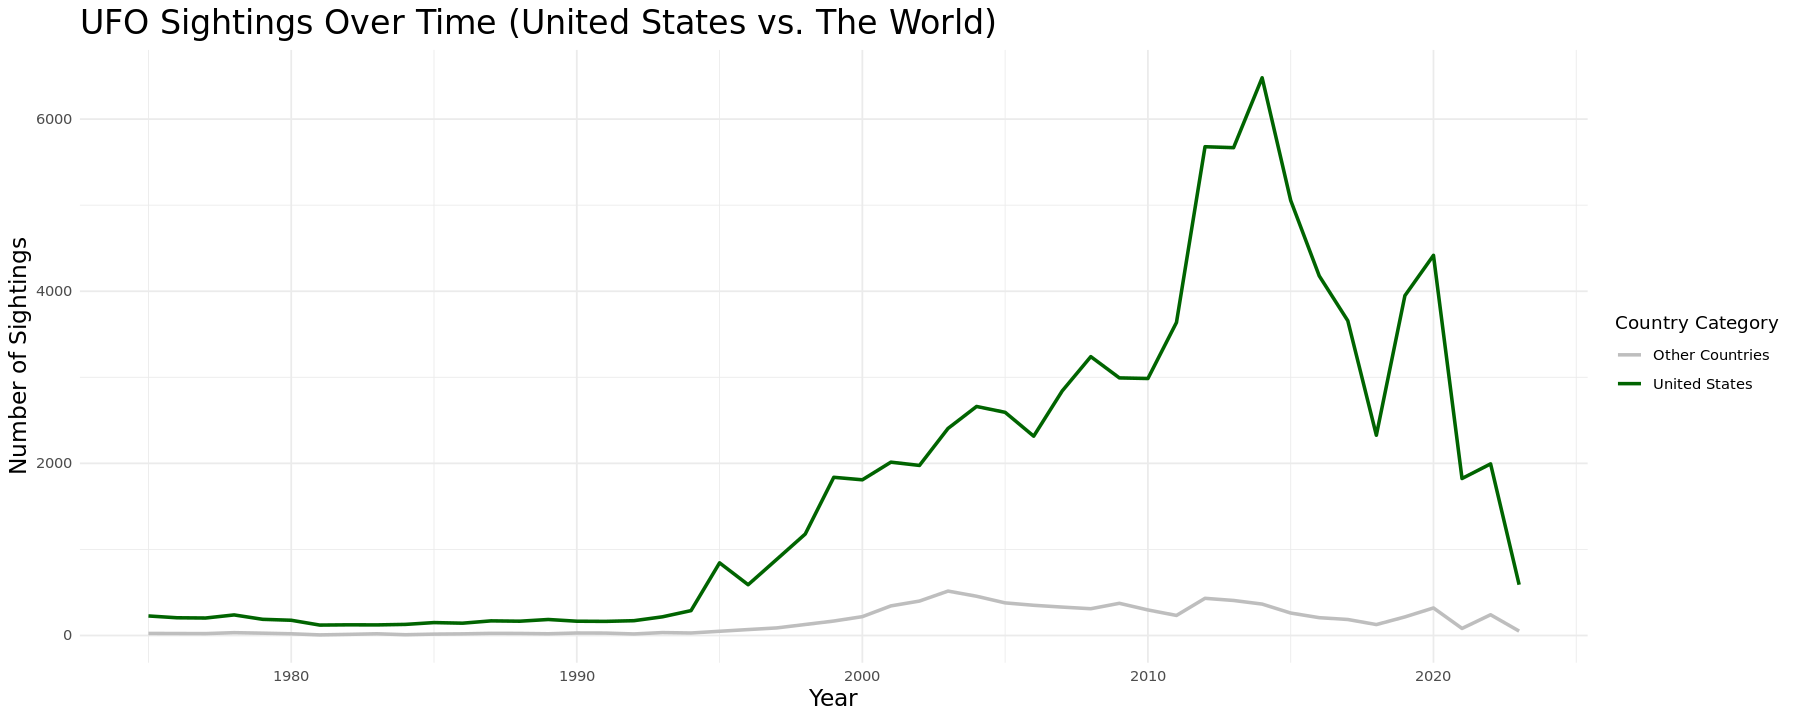

In [4]:
options(repr.plot.width = 15, repr.plot.height = 6)
p = ggplot(sightings_over_time, aes(x = year, y = total_sightings, color = country_category)) +
    geom_line(linewidth = 1) +
    labs(title = "UFO Sightings Over Time (United States vs. The World)", x = "Year", y = "Number of Sightings", 
    color = "Country Category") + 
    scale_color_manual(values = c("United States" = "darkgreen", "Other Countries" = "gray")) +
    theme_minimal() + theme(plot.title = element_text(size = 20), axis.title.x = element_text(size=14), 
    axis.title.y = element_text(size=14))
p

## Visualization 2: Total Sightings by Top 25 States

In [5]:
state_sightings <- ufo_sightings %>%
    filter(country_code == "US") |> 
    group_by(state) |> 
    summarize(total_sightings = n()) |> 
    mutate(state = factor(state, levels = unique(state[order(total_sightings, decreasing = TRUE)]))) |>
    arrange(desc(total_sightings))

print(state_sightings)

# A tibble: 52 × 2
   state total_sightings
   <fct>           <int>
 1 CA              11472
 2 FL               5833
 3 WA               5055
 4 TX               4170
 5 NY               3854
 6 AZ               3448
 7 PA               3181
 8 IL               2995
 9 OH               2954
10 OR               2521
# ℹ 42 more rows


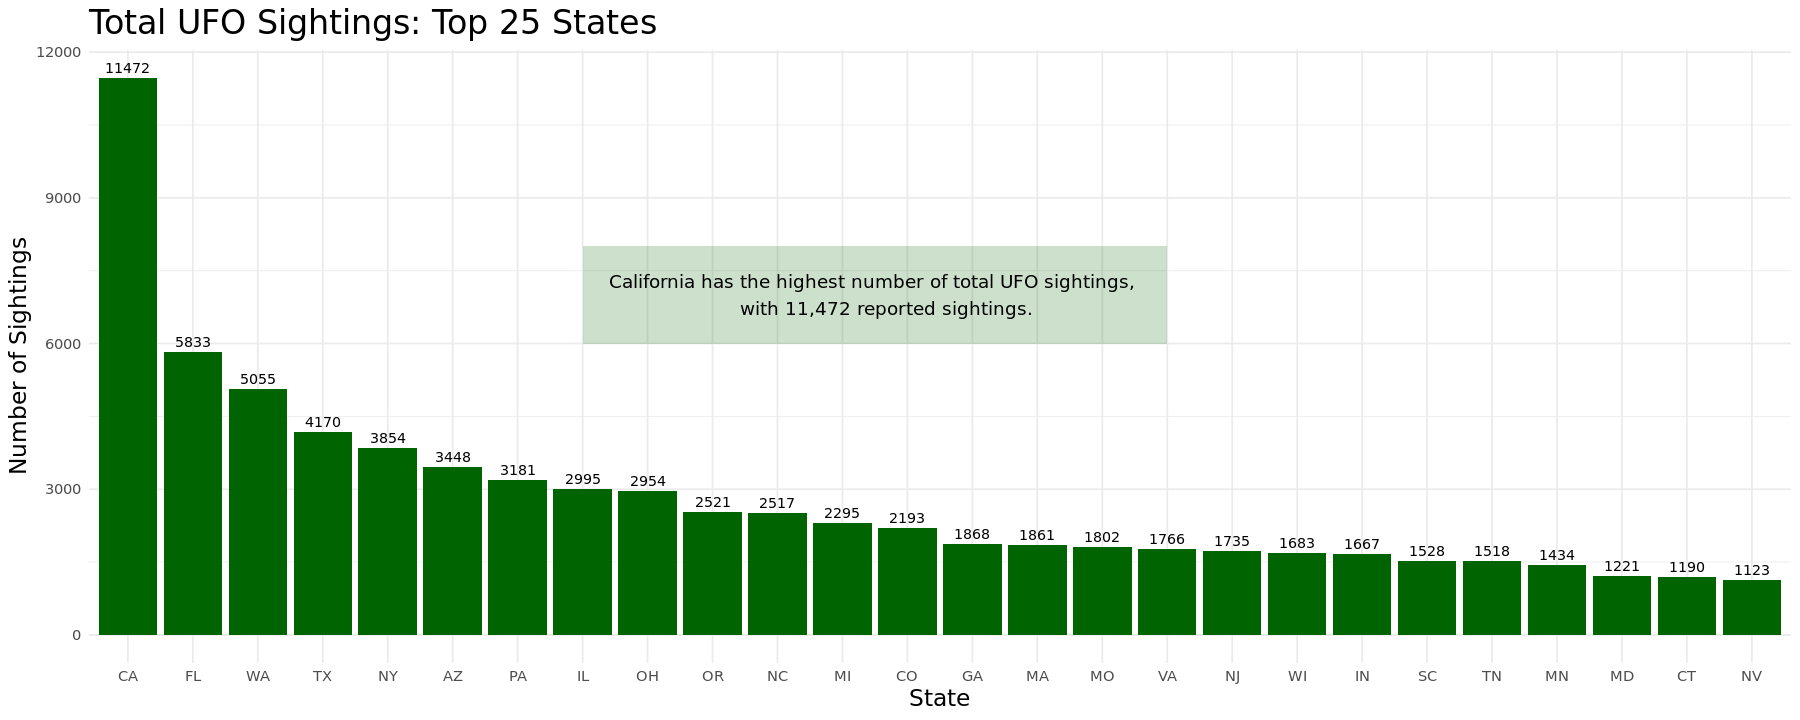

In [6]:
top_25 = state_sightings |>
    slice_max(order_by = total_sightings, n = 26)

options(repr.plot.width = 15, repr.plot.height = 6)
p = ggplot(top_25, aes(x = state, y = total_sightings)) + geom_bar(stat = "identity", fill = "darkgreen") +
    geom_text(aes(label = total_sightings), vjust = -0.5, hjust = 0.5, size = 3) +
    labs(title = "Total UFO Sightings: Top 25 States", x = "State", y = "Number of Sightings") +
    annotate("rect", xmin = 8, xmax = 17, ymin = 6000, ymax = 8000, alpha = 0.2, fill = "darkgreen") +
    annotate("text", x = 12.5, y = 7000, label = "California has the highest number of total UFO sightings, 
    with 11,472 reported sightings.") + theme_minimal() +
    theme(plot.title = element_text(size = 20), axis.title.x = element_text(size=14), 
    axis.title.y = element_text(size=14))
p

## Visualization 3: UFO Sightings by Hour of the Day

In [18]:
ufo_by_hour = ufo_sightings |>
    filter(country_code == "US")

ufo_by_hour = transform(ufo_by_hour,reported_date_time = as.POSIXct(reported_date_time), hour = hour(reported_date_time))

ufo_by_hour |> head()

,reported_date_time,reported_date_time_utc,posted_date,city,state,country_code,shape,reported_duration,duration_seconds,summary,has_images,day_part,hour
,<dttm>,<dttm>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<chr>,<int>
1,2022-08-29 06:03:00,2022-08-29 06:03:00,2022-09-09,Pinehurst,NC,US,NA,15 mins,900,Saw multi color object above horizon.,FALSE,night,6
2,2022-08-20 01:51:00,2022-08-20 01:51:00,2022-10-08,Rapid City,MI,US,NA,1 minute,60,An object in the shape of a straight line about an inch from our viewing area moving slowly across the sky,FALSE,nautical dusk,1
3,2022-08-13 05:30:00,2022-08-13 05:30:00,2022-09-09,Cleveland,OH,US,NA,2 hours,172800,Tone in the air.,FALSE,night,5
4,2022-08-06 21:00:00,2022-08-06 21:00:00,2022-09-09,Bloomington,IN,US,NA,30 seconds,30,Black tic-tac shaped ufo. Moved with insane speed,FALSE,afternoon,21
5,2022-08-04 07:40:00,2022-08-04 07:40:00,2022-09-09,Irvine,CA,US,NA,3 minutes,180,Two alien were scanning me,FALSE,night,7
6,2022-07-22 16:00:00,2022-07-22 16:00:00,2022-09-09,Moore,OK,US,NA,10 minutes,600,Long cigar solid shaped craft with light beam,FALSE,morning,16


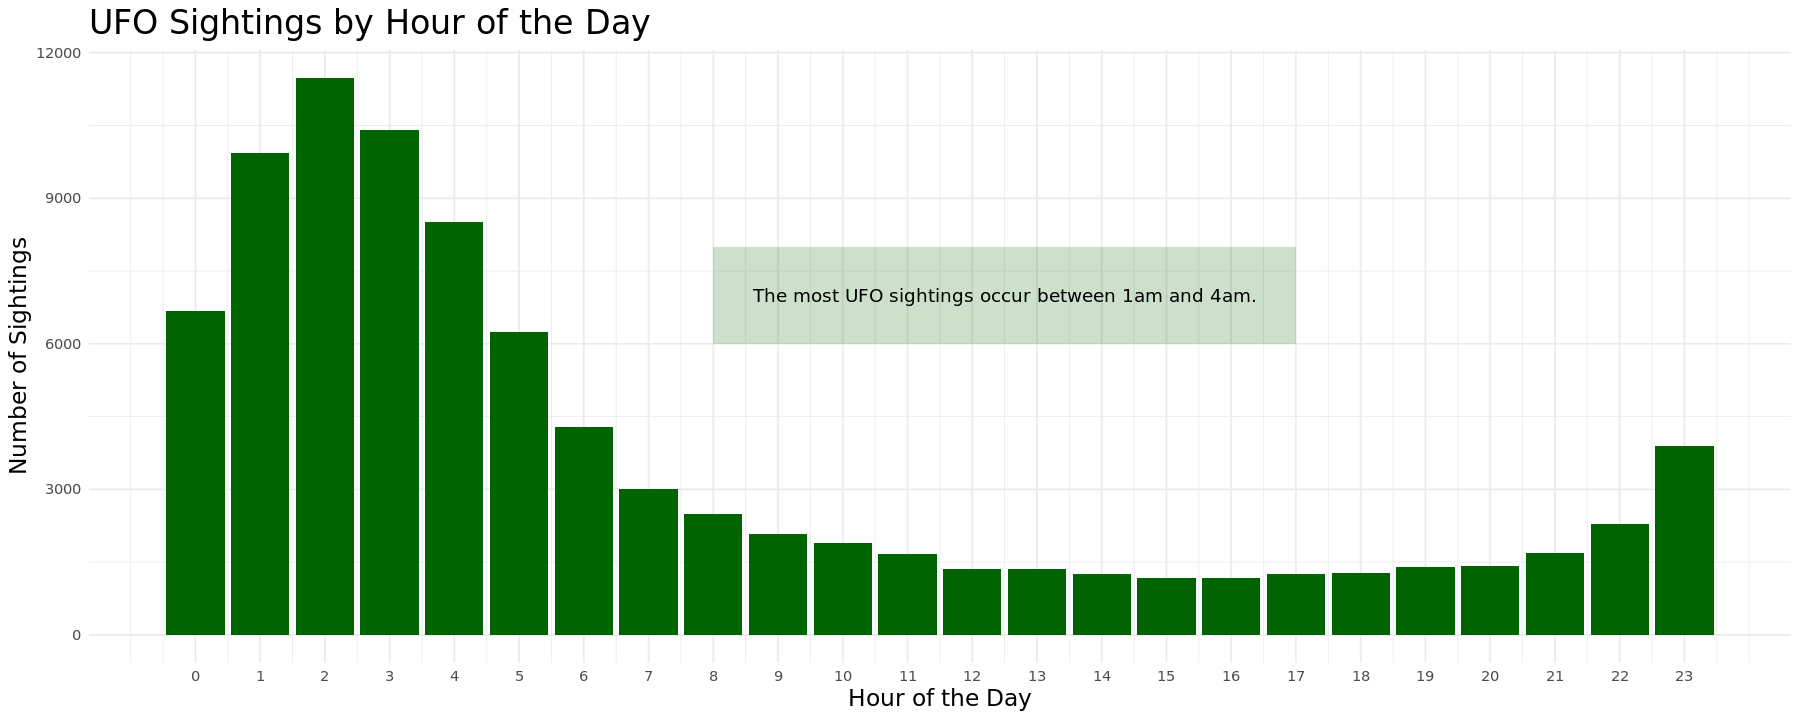

In [21]:
p = ggplot(ufo_by_hour, aes(x = hour)) +
    geom_bar(stat = "count", fill = "darkgreen") +
    labs(title = "UFO Sightings by Hour of the Day", x = "Hour of the Day", y = "Number of Sightings") +
    annotate("rect", xmin = 8, xmax = 17, ymin = 6000, ymax = 8000, alpha = 0.2, fill = "darkgreen") +
    annotate("text", x = 12.5, y = 7000, label = "The most UFO sightings occur between 1am and 4am.") +
    theme_minimal() + theme(plot.title = element_text(size = 20), axis.title.x = element_text(size=14), 
    axis.title.y = element_text(size=14)) + scale_x_continuous(breaks = seq(0, 23, 1))
p

## Exploratory Analysis Narrative
#####   To begin my exploratory analysis of this UFO sightings data, I used the head() function to learn more about the variables and their formats. For all three graphs, I made the aesthetic desicion to use a dark green color scheme (inspired by traditional ideas of aliens). This allowed all three to be cohesive and connected, and I believe the collective three visualizations offer a brief, but in-depth, exploration of theis dataset.

#####   First, I was curious to see what the distribution of sightings over time looked like. As I was doing some extra research on UFO sightings online, I read an article about how the United States has high numbers of UFO sightings do to increased government and military activities. I decided to test that hypothesis by separating all other countries and comparing the number of sightings to the United States' sightings. As you can see in visualization 1, the United States has consistenly had more reported UFO sightings than the rest of the world since 1975. These sightings appeared to begin to spike around 1995. During this process, I used the mutate function to format the reported_date_time variable into just years, and to separate US states from all-world states. I filtered the data to begin at 1975, and used the summarize function to count the total number of sightings (essentially counting the rows). 

#####   I then decided to investigate which states have the most reported sightings. I created a bar chart that counted the total number of sightings by state. I found that California has a strikingly high number of sightings compared to the other top 25 states. I decided to filter the data to only show the top 25 states to be more visually pleasing. With all 50 states on the x-axis, it was extremely cluttered. I also sorted the data into descending order so that it would be very obvious which states have the most sightings. Finally, my third vizualization inteded to investigate which hours of the day have the most reported sightings. I created another bar graph that shows the number of sightings for all 24 hours of the day. It appears that the most sightings occur at 2am. To create this visualization, I used the mutate function to format the reported_date_time variable into just hours and filtered the data to just reflect sightings reported from the United States.